In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


3


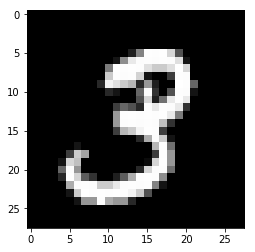

In [4]:
i = np.reshape(mnist.train.images[1], [28,28])
plt.imshow(i, cmap=plt.cm.gray)
print(np.argmax(mnist.train.labels[1]))

In [5]:
def hidden_layer(X,W,b):
    return tf.nn.relu(tf.matmul(X,W) + b)

def output_layer(X,W,b):
    return tf.matmul(X, W) + b

def variables(n_input, n_out):
    return tf.Variable(tf.random_normal([n_input,n_out])), tf.Variable(tf.random_normal([n_out]))


In [6]:
def model(X,y):
    
    
    with tf.name_scope('h1'):
        W1, b1 = variables(784, 500)
    with tf.name_scope('h2'):
        W2, b2 = variables(500, 500)
    with tf.name_scope('out'):
        W3, b3 = variables(500, 10)
    
    l1 = hidden_layer(X, W1, b1)
    l2 = hidden_layer(l1, W2, b2)
    out = output_layer(l2, W3, b3)
    pred = tf.argmax(out, 1)
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out, labels=y))
    
    tf.summary.scalar('loss', loss)
    
    global_step = tf.Variable(0, name='global_step', trainable=False)
    train = tf.train.AdamOptimizer(0.01).minimize(loss, global_step=global_step)
    
    correct_pred = tf.equal(pred, tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, 'float'))
    tf.summary.scalar('accuracy', accuracy)
    
    return train, pred, out, loss, accuracy


In [7]:
with tf.Graph().as_default():
    X = tf.placeholder(dtype=tf.float32, shape = (None, 784))
    y = tf.placeholder(dtype=tf.float32, shape = (None, 10))
    
    train, pred, out, loss, accuracy = model(X,y)
    
    summary = tf.summary.merge_all()
    
    epochs = 1000
    batch_size = 100

    with tf.Session() as sess:
        
        summary_writer = tf.summary.FileWriter('/tmp/train_data', sess.graph)
        
        sess.run(tf.global_variables_initializer())
    
        for i in range(epochs * int(mnist.train.num_examples/batch_size)):
                X_train, y_train = mnist.train.next_batch(batch_size)
                feed_dict = {X: X_train, y: y_train}
                _, training_loss = sess.run([train, loss], feed_dict=feed_dict)
                
                if(i % 100 == 0):
                    
                    acc = accuracy.eval({X: mnist.validation.images, y: mnist.validation.labels})
                    test_acc = accuracy.eval({X: mnist.test.images, y: mnist.test.labels})
                    
                    print('Epoch', str(i) + '/' + str(epochs), ': loss:', training_loss, 'Val Accuracy:', acc, 'Test Accuracy:', test_acc)
                    summary_str = sess.run(summary, feed_dict=feed_dict)
                    summary_writer.add_summary(summary_str, i)
                    summary_writer.flush()
                    

Epoch 0/1000 : loss: 2975.2 Val Accuracy: 0.1312 Test Accuracy: 0.1241
Epoch 100/1000 : loss: 103.217 Val Accuracy: 0.905 Test Accuracy: 0.9008
Epoch 200/1000 : loss: 60.8286 Val Accuracy: 0.9184 Test Accuracy: 0.9162
Epoch 300/1000 : loss: 100.308 Val Accuracy: 0.9258 Test Accuracy: 0.9266
Epoch 400/1000 : loss: 76.2198 Val Accuracy: 0.9314 Test Accuracy: 0.9221
Epoch 500/1000 : loss: 11.0973 Val Accuracy: 0.9462 Test Accuracy: 0.9389
Epoch 600/1000 : loss: 32.8495 Val Accuracy: 0.9496 Test Accuracy: 0.9421
Epoch 700/1000 : loss: 1.36773 Val Accuracy: 0.9514 Test Accuracy: 0.9485
Epoch 800/1000 : loss: 30.9328 Val Accuracy: 0.9444 Test Accuracy: 0.9403
Epoch 900/1000 : loss: 16.3806 Val Accuracy: 0.9526 Test Accuracy: 0.9459
Epoch 1000/1000 : loss: 14.2574 Val Accuracy: 0.9484 Test Accuracy: 0.9483
Epoch 1100/1000 : loss: 18.713 Val Accuracy: 0.9502 Test Accuracy: 0.9486
Epoch 1200/1000 : loss: 8.53087 Val Accuracy: 0.952 Test Accuracy: 0.9507
Epoch 1300/1000 : loss: 0.0 Val Accuracy:

KeyboardInterrupt: 

In [ ]:
np.shape(mnist.validation.labels)

In [ ]:
import tensorboard.main
